#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 5
### Due: Monday, Feb 28th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 28th.

---

## Problem 1

We have seen that for some distributions, we can solve the for the maximum liklehood analytically.

a) Solve analytically for the maximum liklihood of the Poisson distribution.

b) Solve analytically for the maximum likelihood for a Gaussian where the uncertainties are *hetero*scedastic.

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.

### Solution

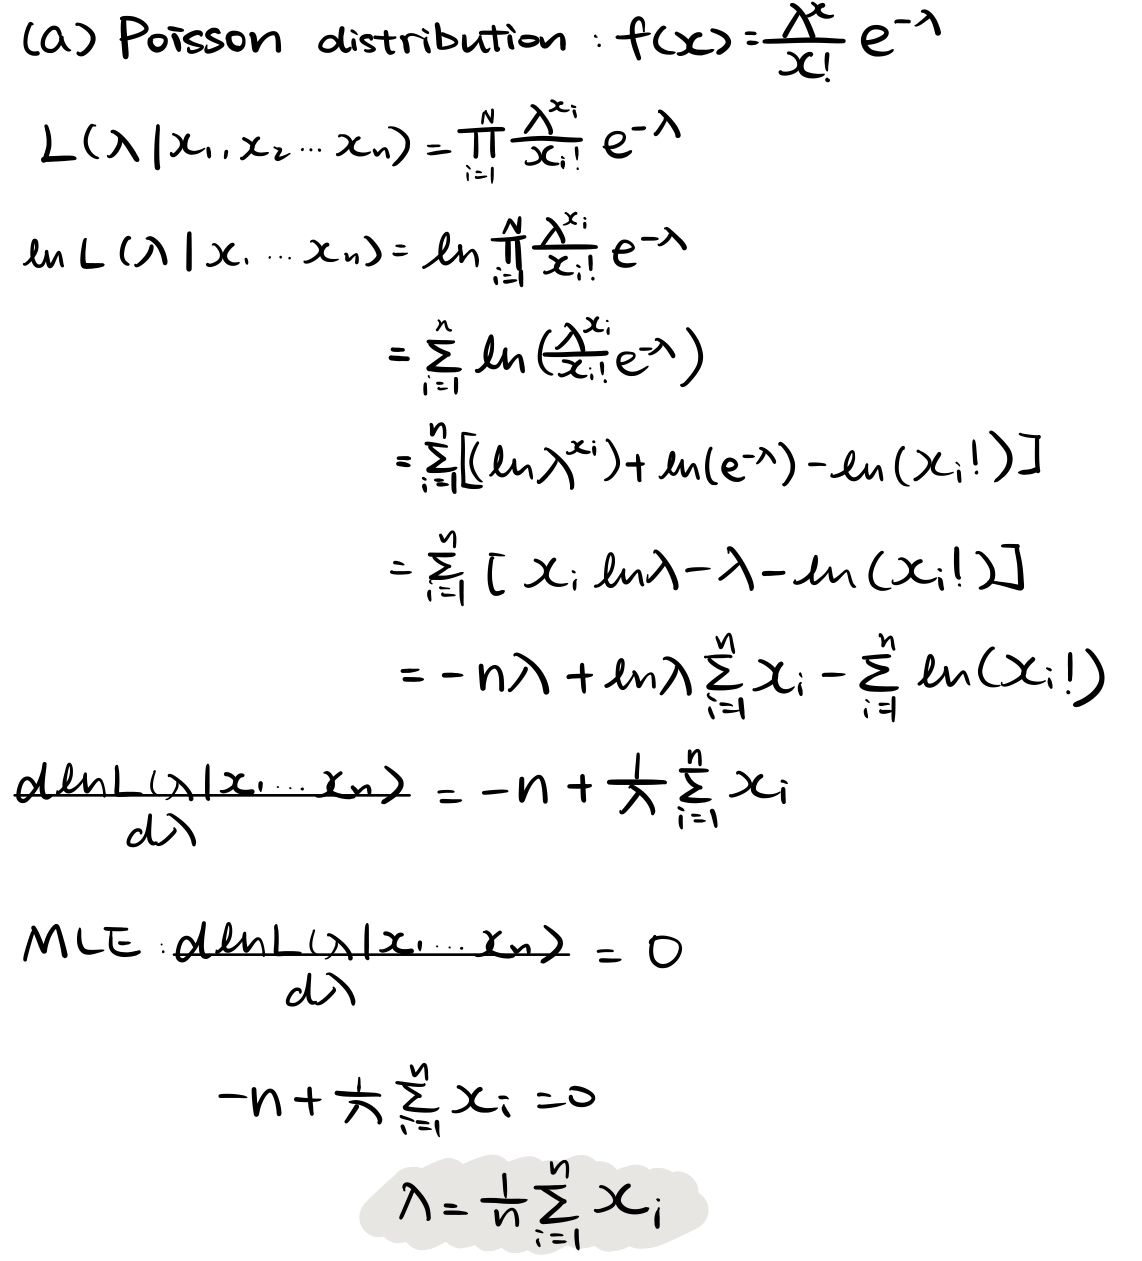

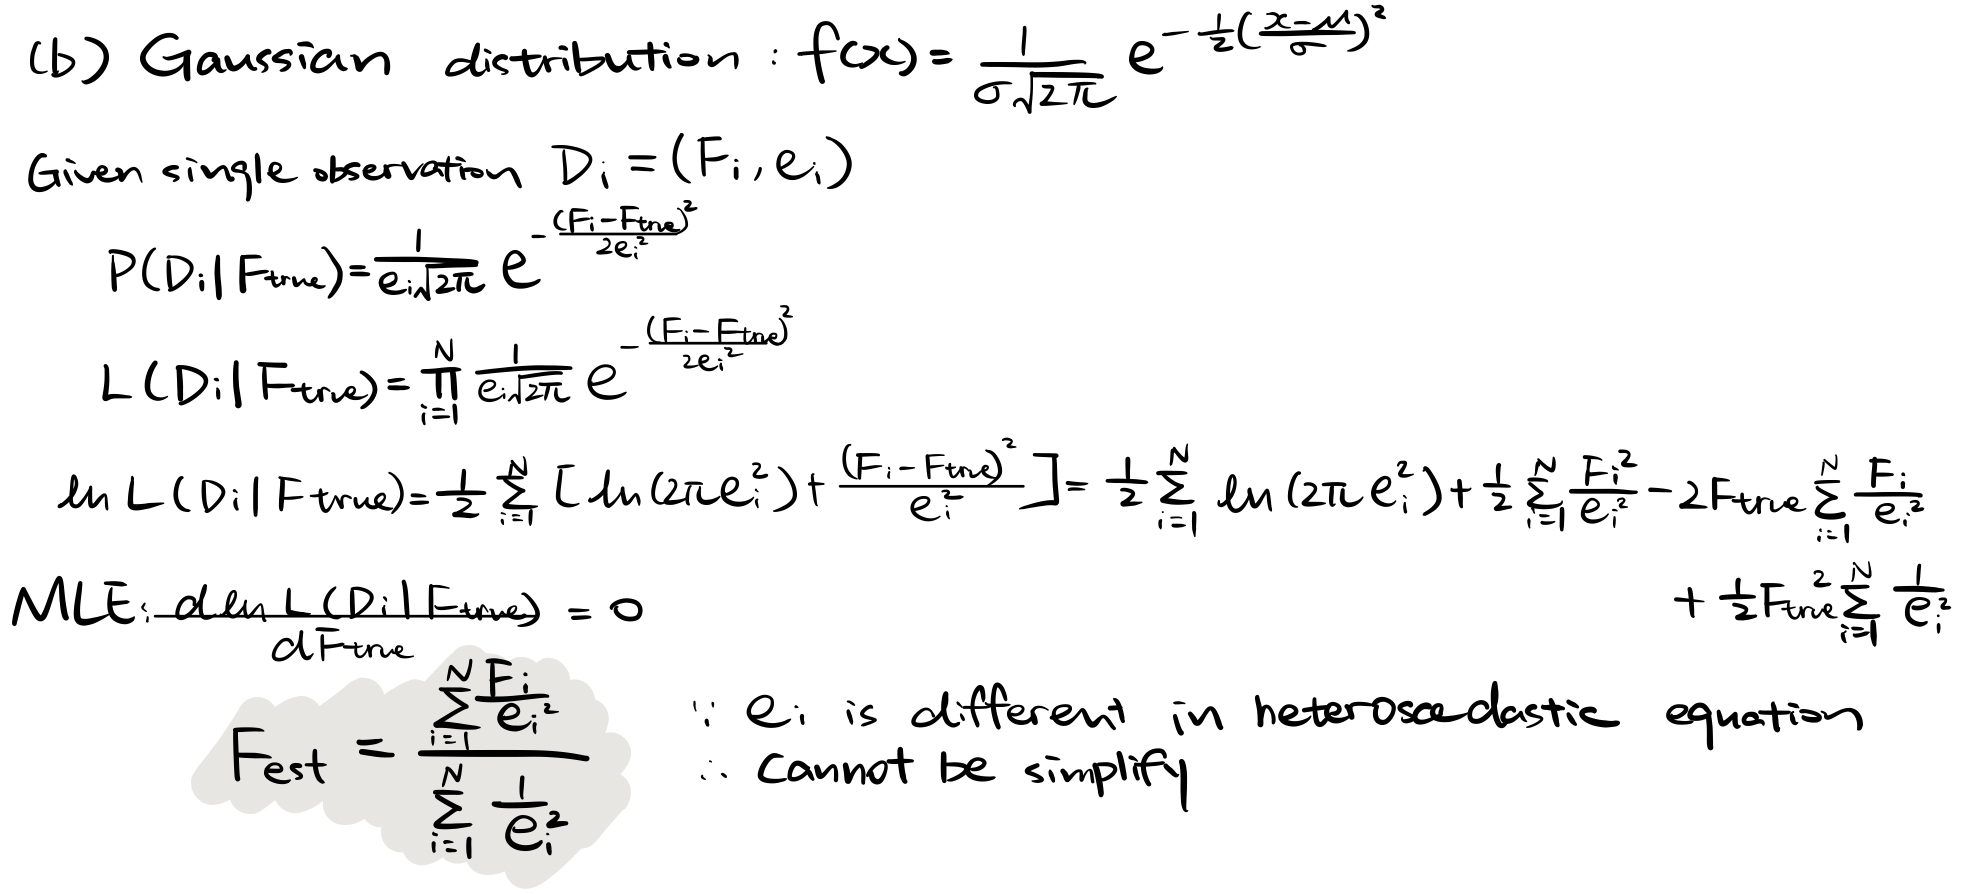

## Problem 2

In the lecture we have seen how data sets influenced by outliers can be fitted better when using the Huber loss function.
Another way to deal with outliers is called Winsorizing or winsorization and implemented in scipy (from scipy.stats.mstats import winsorize).
a) using the scipy online documentation, look up what this method means and write a small Python example.
b try to fit the data from our lecture, section "Fitting A Straight Line To Data", after applying Winsorizing, and describe 



### Solution



In [13]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from scipy import optimize
from astroML import stats as astroMLstats
from astroML.datasets import fetch_hogg2010test

In [14]:
from scipy.stats.mstats import winsorize

# set data in array
a = np.array([10, 4, 9, 8, 5, 3, 7, 2, 1, 6])

# The 10% of the lowest value (i.e., 1) is replaced by the next smallest value(2)
# The 20% of the highest values (i.e., 9 and 10) are replaced with the next largest value(8)
b = winsorize(a, limits=[0.1, 0.2])

print(a)
print(b)

[10  4  9  8  5  3  7  2  1  6]
[8 4 8 8 5 3 7 2 2 6]


Optimization terminated successfully.
         Current function value: 18.680770
         Iterations: 53
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 289.963723
         Iterations: 70
         Function evaluations: 133
Optimization terminated successfully.
         Current function value: 85.055557
         Iterations: 78
         Function evaluations: 149


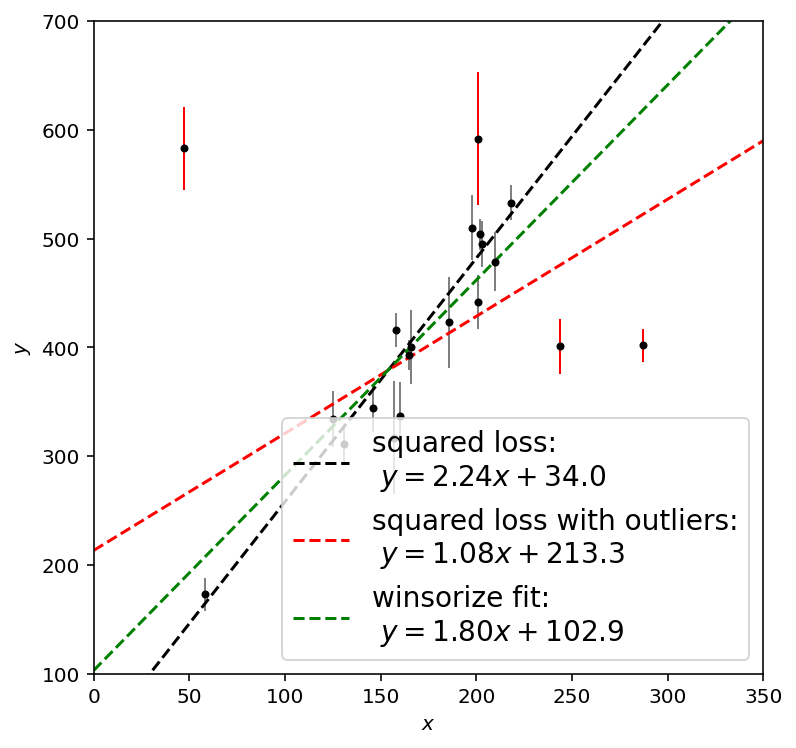

In [20]:
# Plot the results
data = fetch_hogg2010test()
x = data['x'] # x data
y = data['y'] # y data
dy = data['sigma_y'] # uncertainties on y data

def squared_loss(m, b, x, y, dy):
    y_fit = m * x + b
    return np.sum(((y - y_fit) / dy) ** 2, -1)

f_squared = lambda beta: squared_loss(beta[0], beta[1], 
                                      x=x[4:], y=y[4:], 
                                      dy=dy[4:])

beta0 = (1, 30) # initial guess for a and b
beta_squared = optimize.fmin(f_squared, beta0)

f_squared_outlier = lambda beta_outlier: squared_loss(beta_outlier[0], 
                                                      beta_outlier[1], 
                                                      x=x, y=y, dy=dy)

beta0 = (1, 30) # initial guess for a and b
beta_squared_outlier = optimize.fmin(f_squared_outlier, beta0)

f_squared_winsorize = lambda beta: squared_loss(beta[0], beta[1], 
                                      x=winsorize(x, limits=[0.1, 0.2]), 
                                      y=winsorize(y, limits=[0.1, 0.2]), 
                                      dy=winsorize(dy, limits=[0.1, 0.2]))

beta0 = (1, 30) # initial guess for a and b
beta_squared_winsorize = optimize.fmin(f_squared_winsorize, beta0)


# Plot the results
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# plot the data without outliers in gray
ax.errorbar(x[4:], y[4:], dy[4:], 
            fmt='.k', lw=1, ecolor='gray')
# plot the outliers in red
ax.errorbar(x[0:4], y[0:4], dy[0:4], 
            fmt='.k', lw=1, ecolor='red')

x_fit = np.linspace(0, 350, 10)
# plot the regular fit from before without outliers
ax.plot(x_fit, beta_squared[0] * x_fit + beta_squared[1], 
        ls='--', color='k',
        label="squared loss:\n $y=%.2fx + %.1f$" % tuple(beta_squared))
# plot the fit that includes outliers
ax.plot(x_fit, beta_squared_outlier[0] * x_fit + beta_squared_outlier[1],
        ls='--', color='red',
        label="squared loss with outliers:\n $y=%.2fx + %.1f$" % tuple(beta_squared_outlier))
# plot the winsorize fit
ax.plot(x_fit, beta_squared_winsorize[0] * x_fit + beta_squared_winsorize[1],
        ls='--', color='green',
        label="winsorize fit:\n $y=%.2fx + %.1f$" % tuple(beta_squared_winsorize))

ax.set_xlim(0, 350)
ax.set_ylim(100, 700)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc=4, prop=dict(size=14))